#  Step 1: Load Dataset

In [3]:
import pandas as pd

# Load temperature data
temp_df = pd.read_csv("temperature.csv")
print(temp_df.columns)


Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')


# Step 2: Choose a City (Boston)

In [6]:
import pandas as pd

# Step 1: Load the CSV file
df = pd.read_csv('temperature.csv')

# Step 2: Select date and London temperature columns
df = df[['datetime', 'Boston']].copy()
df.columns = ['Date', 'Temperature']

# Step 3: Convert Date to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Optional: View the first few rows
print(df.head())


                 Date  Temperature
0 2012-10-01 12:00:00          NaN
1 2012-10-01 13:00:00   287.170000
2 2012-10-01 14:00:00   287.186092
3 2012-10-01 15:00:00   287.231672
4 2012-10-01 16:00:00   287.277251


In [8]:
# Step 1: Load the Data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('temperature.csv')

# Step 2: Select Boston data
df = df[['datetime', 'Boston']].copy()
df.columns = ['Date', 'Temperature']

# Step 3: Convert to datetime and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

# Step 4: Resample to daily average
df = df.resample('D').mean()

# Step 5: Fill missing values
df = df.ffill()

# Optional: Check the head
df.head()


,Temperature
Date,
2012-10-01,287.371091
2012-10-02,289.013090
2012-10-03,289.020833
2012-10-04,290.043750
2012-10-05,289.517292


# Step 3: Visualize Boston Temperature

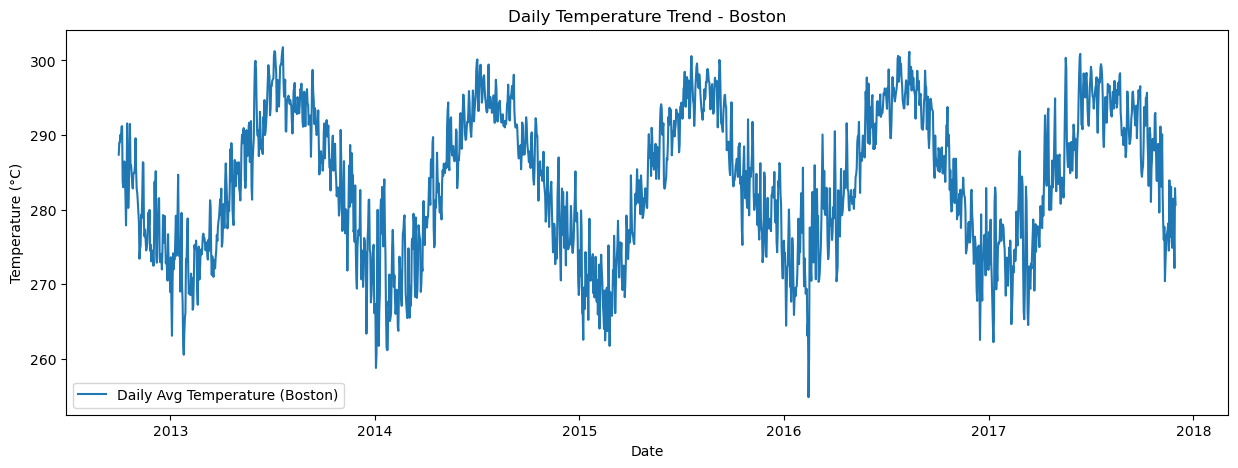

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df['Temperature'], label='Daily Avg Temperature (Boston)')
plt.title('Daily Temperature Trend - Boston')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


# Step 4: Add Rolling Average (Trend Smoothing)

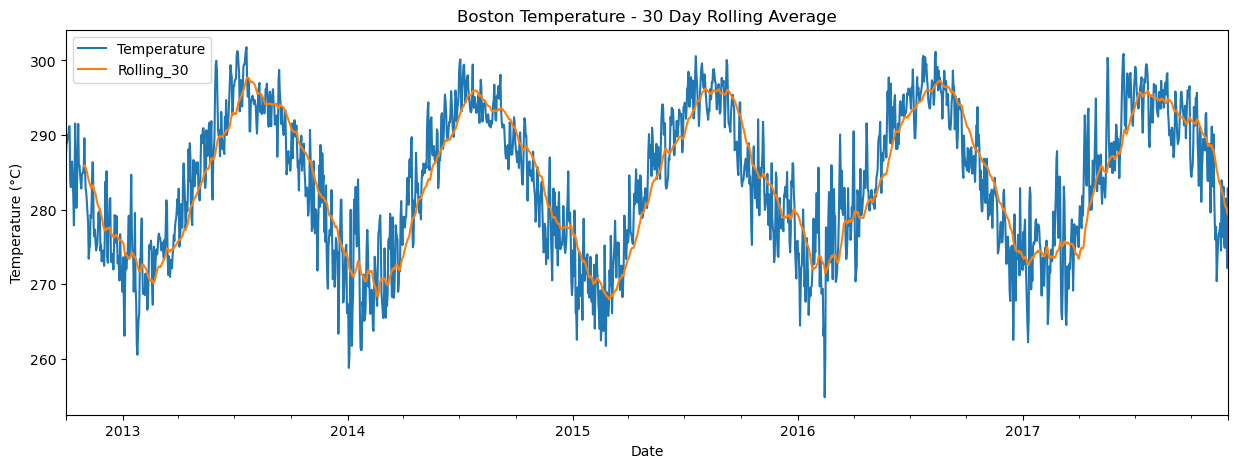

In [10]:
df['Rolling_30'] = df['Temperature'].rolling(window=30).mean()

df[['Temperature', 'Rolling_30']].plot(figsize=(15,5), title='Boston Temperature - 30 Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


#  Step 5: Decompose Time Series (Trend, Seasonality)

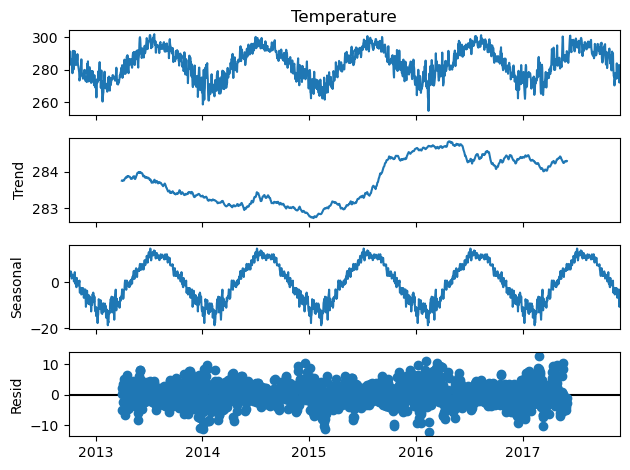

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(df['Temperature'], model='additive', period=365)
decompose_result.plot()
plt.tight_layout()
plt.show()


#  Step 6: Prepare Data for Regression

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert dates to numeric ordinal for regression
df = df.dropna()
X = np.array(df.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
y = df['Temperature'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 7: Train Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 87.09919666691802
R2 Score: 0.015717289651972943


#  Step 8: Plot Actual vs Predicted Temperatures

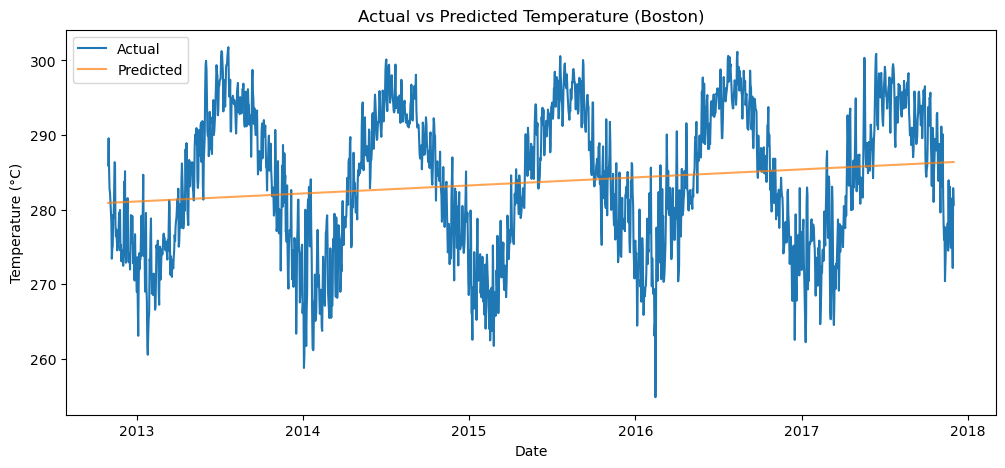

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, y, label='Actual')
plt.plot(df.index, model.predict(X), label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Temperature (Boston)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


#  Step 9: Forecast Next 30 Days

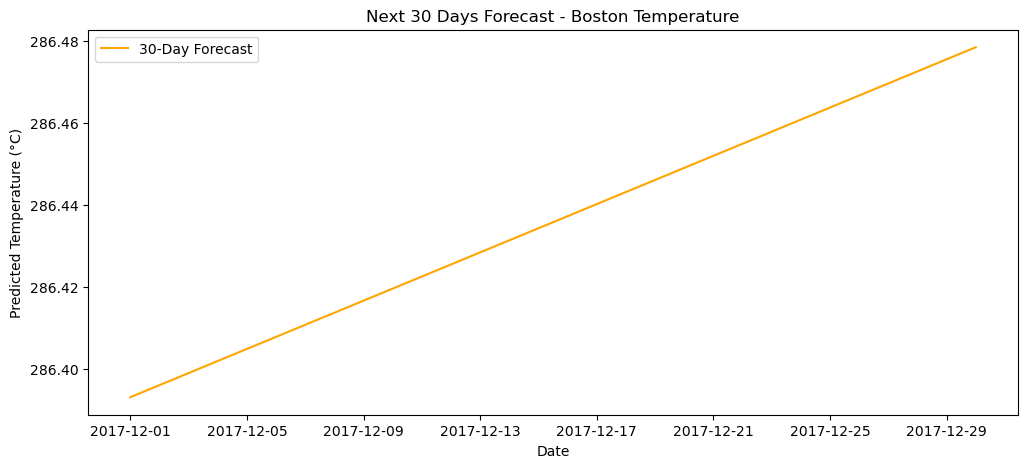

In [15]:
import pandas as pd

# Generate future dates
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
future_ordinals = np.array(future_dates.map(pd.Timestamp.toordinal)).reshape(-1, 1)

# Predict future temperatures
future_preds = model.predict(future_ordinals)

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(future_dates, future_preds, label='30-Day Forecast', color='orange')
plt.title('Next 30 Days Forecast - Boston Temperature')
plt.xlabel('Date')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.show()


# Project Summary:-
- Analyzed historical hourly temperature data for Boston (2012–2017).

- Resampled data to daily averages for easier trend analysis.

-  Performed EDA, including line plots and 30-day rolling averages.

- Applied time series decomposition to identify trend and seasonality.

- Built a Linear Regression model using date as a numerical feature.

- Evaluated model performance using R² Score and MSE.

- Forecasted next 30 days of temperature trends.

- Demonstrated key skills in data preprocessing, visualization, time series analysis, and regression modeling.

